In [771]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


In [772]:
len([f.split("_")[:3] for f in os.listdir("/home/kristaps/Projs/bulbulis/data/") if ".jp2" in f])


63558

In [773]:
parts = [f.split("_")[:3] for f in os.listdir("/home/kristaps/Projs/bulbulis/data/") if ".jp2" in f]


In [774]:
len(sorted(list(set([p[1][:8] for p in parts]))))


1855

In [775]:
dates = {}

for d in list(set([p[1][:8] for p in parts])):
    if d[:4] not in dates:
        dates[d[:4]] = {
            d[4:6]: 1
        }
    elif d[4:6] not in dates[d[:4]]:
        dates[d[:4]][d[4:6]] = 1
    else:
        dates[d[:4]][d[4:6]] += 1
        

In [776]:
years = sorted(list(dates.keys()))
months = [str(i).zfill(2) for i in range(1, 13)]
for y in years:
    print(f"{y} => {" | ".join([f"{m}:{dates[y].get(m, 0):2}" for m in months])}")
    

2017 => 01: 0 | 02: 0 | 03: 0 | 04:28 | 05:26 | 06:27 | 07:23 | 08:22 | 09:28 | 10:29 | 11:28 | 12:30
2018 => 01:31 | 02:27 | 03:31 | 04:27 | 05:29 | 06:29 | 07:26 | 08:28 | 09:27 | 10:24 | 11:21 | 12:17
2019 => 01:26 | 02:27 | 03:30 | 04:28 | 05:17 | 06:21 | 07:18 | 08:21 | 09:28 | 10:15 | 11:16 | 12:31
2020 => 01:25 | 02:19 | 03:15 | 04:15 | 05:14 | 06:12 | 07:17 | 08: 8 | 09: 9 | 10:27 | 11:11 | 12:12
2021 => 01:31 | 02:27 | 03:26 | 04:11 | 05:19 | 06:17 | 07:17 | 08:12 | 09:10 | 10:20 | 11: 9 | 12:12
2022 => 01:15 | 02:21 | 03:18 | 04:28 | 05: 6 | 06: 9 | 07:30 | 08:10 | 09:15 | 10:31 | 11:30 | 12:27
2023 => 01:21 | 02: 7 | 03: 3 | 04:26 | 05:19 | 06:12 | 07:30 | 08:29 | 09:30 | 10:17 | 11:16 | 12:11
2024 => 01: 4 | 02: 1 | 03: 7 | 04:10 | 05:20 | 06:13 | 07: 5 | 08: 7 | 09:14 | 10:15 | 11: 2 | 12: 2
2025 => 01:29 | 02:28 | 03: 6 | 04: 0 | 05: 0 | 06: 0 | 07: 0 | 08: 0 | 09: 0 | 10: 0 | 11: 0 | 12: 0


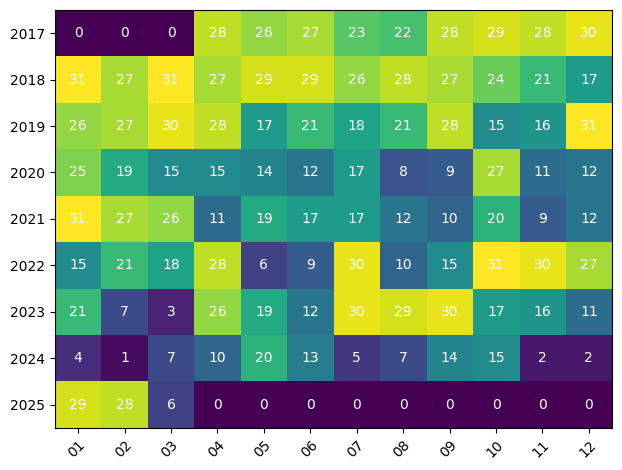

In [777]:
coverage = np.array([[dates[y].get(m, 0) for m in months] for y in years])

fig, ax = plt.subplots()
im = ax.imshow(coverage)

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(len(months)), labels=months, rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(years)), labels=years)

# Loop over data dimensions and create text annotations.
for i in range(len(years)):
    for j in range(len(months)):
        text = ax.text(j, i, coverage[i, j], ha="center", va="center", color="w")

fig.tight_layout()
plt.show()


In [778]:
parts = [f.split("_")[:3] for f in os.listdir("/home/kristaps/Projs/bulbulis/data/") if ".jp2" in f]


In [779]:
len(sorted(list(set([p[1][:8]+p[0] for p in parts]))))


13564

In [780]:
dates = {}

for d in list(set([p[1][:8]+p[0] for p in parts])):
    if d[:4] not in dates:
        dates[d[:4]] = {
            d[4:6]: 1
        }
    elif d[4:6] not in dates[d[:4]]:
        dates[d[:4]][d[4:6]] = 1
    else:
        dates[d[:4]][d[4:6]] += 1
        

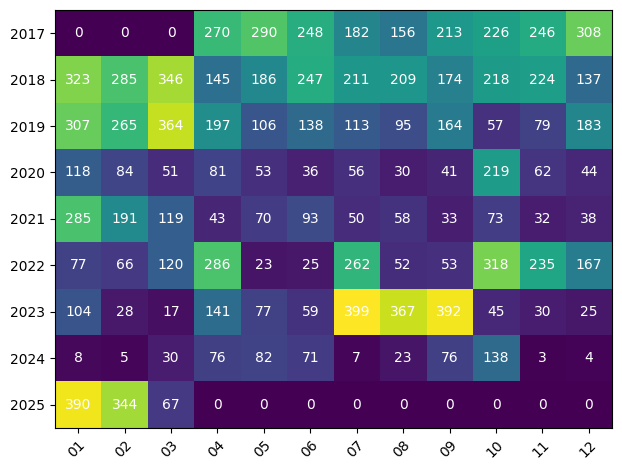

In [781]:
coverage = np.array([[dates[y].get(m, 0) for m in months] for y in years])

fig, ax = plt.subplots()
im = ax.imshow(coverage)

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(len(months)), labels=months, rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(years)), labels=years)

# Loop over data dimensions and create t ext annotations.
for i in range(len(years)):
    for j in range(len(months)):
        text = ax.text(j, i, coverage[i, j], ha="center", va="center", color="w")

fig.tight_layout()
plt.show()
